## Program to demonstrate classification using ID3 algorithm

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import math

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:

def calculate_entropy(data, target_column):
    total_rows = len(data)
    target_values = data[target_column].unique()

    entropy = 0
    for value in target_values:
        # Calculate the proportion of instances with the current value
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion)  # entropy = entropy - ...

    return entropy

# Example usage (assuming df is already defined and has a column 'Outcome')
entropy_outcome = calculate_entropy(df, 'Outcome')
print(f"Entropy of the dataset: {entropy_outcome:.4f}")


Entropy of the dataset: 0.9331


In [10]:
def calculate_entropy(data, target_column): # for each categorical variable
    total_rows = len(data)
    target_values = data[target_column].unique()

    entropy = 0
    for value in target_values:
        # Calculate the proportion of instances with the current value
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion) if proportion != 0 else 0

    return entropy
  
def calculate_information_gain(data, feature, target_column):

    # Calculate weighted average entropy for the feature
    unique_values = data[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset, target_column)

    # Calculate information gain
    information_gain = entropy_outcome - weighted_entropy

    return information_gain

In [13]:
from tabulate import tabulate

# Prepare list to store results
results = []

# Calculate base entropy once
base_entropy = calculate_entropy(df, 'Outcome')

for column in df.columns[:-1]:
    info_gain = calculate_information_gain(df, column, 'Outcome')
    results.append([column, f"{base_entropy:.3f}", f"{info_gain:.3f}"])


print(tabulate(results, headers=["Feature", "Entropy (Outcome)", "Information Gain"], tablefmt="fancy_grid"))


╒══════════════════════════╤═════════════════════╤════════════════════╕
│ Feature                  │   Entropy (Outcome) │   Information Gain │
╞══════════════════════════╪═════════════════════╪════════════════════╡
│ Pregnancies              │               0.933 │              0.062 │
├──────────────────────────┼─────────────────────┼────────────────────┤
│ Glucose                  │               0.933 │              0.304 │
├──────────────────────────┼─────────────────────┼────────────────────┤
│ BloodPressure            │               0.933 │              0.059 │
├──────────────────────────┼─────────────────────┼────────────────────┤
│ SkinThickness            │               0.933 │              0.082 │
├──────────────────────────┼─────────────────────┼────────────────────┤
│ Insulin                  │               0.933 │              0.277 │
├──────────────────────────┼─────────────────────┼────────────────────┤
│ BMI                      │               0.933 │              

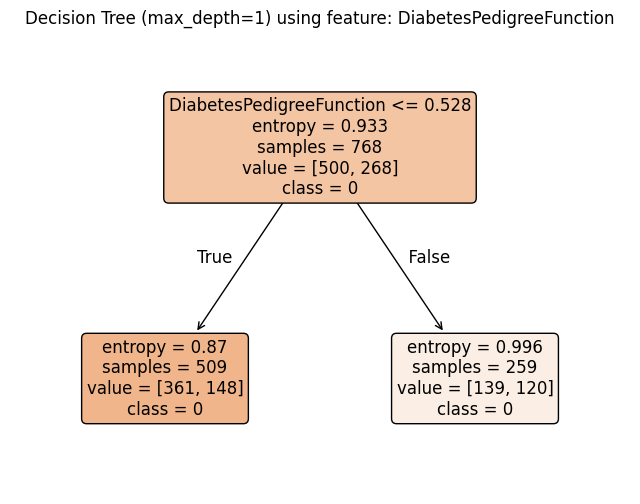

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Feature selection for the first step in making decision tree
selected_feature = 'DiabetesPedigreeFunction'

# Prepare data
X = df[[selected_feature]]
y = df['Outcome']

# Create and train the decision tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(8, 6))
plot_tree(clf,
          feature_names=[selected_feature],
          class_names=['0', '1'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title(f"Decision Tree (max_depth=1) using feature: {selected_feature}")
plt.show()
